# Assignement 3

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import pystan
import random
import scipy.stats

## Task A

## 1.
### a.
Drawing venn digrams corresponding to $p(\text{Blue eyes})$ and $p(\text{Red} \cup \text{Blond hair})$ we get the following
![Venn Digrams](4.1.png)

Comparing to equation 4.9 $$p(c|r)=\frac{p(r,c)}{p(r)}$$

we can see that the nominator $p(r,c)$ corresponds to the sum of the elements in the intersection of the two regions $\sum p(\text{blue eyes} \cap (\text{Red} \cup \text{Blond hair})=0.03+0.16=0.19$.

The denominator corresponds to the sum of all elements in the red circle. $\sum p(\text{Red} \cup \text{Blond hair})=0.33$ This is the marginal probability and can be thought of as the new "universe" to which we limit ourselves.

The conditional probability $p(\text{Blue eyes}|\text{Red} \cup \text{Blond hair})=\frac{0.19}{0.33}=0.5757...$,  approximately 57,6%

### b.
The "areas" make sense since the marginal likelihood over which we are observing the values is small compared to the full set of values. The classical definition of probability says. 
    "The probability of an event is the ratio of the number of cases favorable to it, to the number of all cases possible when nothing leads us to expect that any one of these cases should occur more than any other, which renders them, for us, equally possible". In this case the "number of all cases possible" is the union $\text{Red} \cup \text{Blond hair}$. 


## 2.

The code below defines a function that iteratively updates the prior from the calculated posterior from chapter 5.4 in the book. 

In [50]:
def DiseaseTest(T):
    p={}          #Pre-allocate dictionary
    p['+|:(']=.99 #Hit-rate of test (does not change)
    p['+|:)']=.05 #False alarm rate (does not change)
    p['-|:(']=1-p['+|:(']
    p['-|:)']=1-p['+|:)']
    
    p[':(']=.001 #Prior desease frequency
    p[':)']=1-p[':(']
    
    for e in range(len(T)):
        if len(T)>0:
            #Marginal likelihoods
            p['+']=p['+|:)']*p[':)']+p['+|:(']*p[':(']
            p['-']=p['-|:)']*p[':)']+p['-|:(']*p[':(']

            #Posteriors
            p[':(|+']=p['+|:(']*p[':(']/p['+']
            p[':(|-']=p['-|:(']*p[':(']/p['-']
            p[':)|+']=1-p[':(|+']
            p[':)|-']=1-p[':(|-']

            #Update of prior
            p[':(']=p[':(|'+T[e]]
            p[':)']=1-p[':(']  
    
    Result=(p[':('], p[':)']) #Returns the probability of having/not- having the disease
            
    return(Result)

Defining a test sequence as a series of positive or negative results and running the function.

In [51]:
T='++-' #Set a test result sequence
DiseaseTest(T)

(0.0041138738412022065, 0.9958861261587978)

## Task B
### 1.
Unlike in Assignment 1 I will now use the built in statistical package for sampling. Sampling from the bernoulli distribution can be done as follows

In [52]:
r = scipy.stats.bernoulli.rvs(.9, size=10) #random variable sampling (\theta,numbers of samples)
print(r)

[1 0 0 1 1 1 1 1 1 1]


### 2.

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


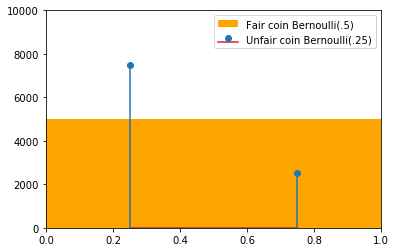

In [53]:
fair = scipy.stats.bernoulli.rvs(.5, size=10000) #random variable sampling fair coin
unfair = scipy.stats.bernoulli.rvs(.25, size=10000) #random variable sampling unfair coin

#plt.stem([.25,.75],[list(fair).count(0),list(fair).count(1)])
plt.hist(fair,(0,0.5,1),color='#FFA500')
plt.stem([.25,.75],[list(unfair).count(0),list(unfair).count(1)])
plt.legend(('Fair coin Bernoulli(.5)','Unfair coin Bernoulli(.25)'))
plt.axis([0,1,0,len(fair)])
plt.show()

### 3.
For the likelihood function of 6.1 using $y=0$ on $\theta \in [0,1]$

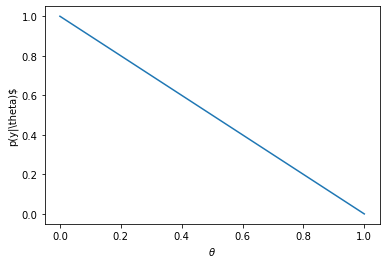

In [54]:
def LF(y,theta):
    p=theta**y*(1-theta)**(1-y)
    return(p)
theta=np.linspace(0,1,1000)
y=0

plt.plot(theta,LF(y,theta))
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()

Now we do the same but with $y=0$ on $\theta \in [0,1]$

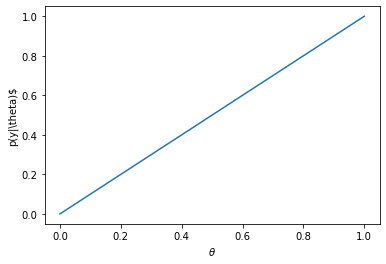

In [55]:
y=1
plt.plot(theta,LF(y,theta))
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()

### 4.
#### a.

i. was already defined above. Now we define ii.

In [56]:
def IndProduct(y,theta): #function for the independent product
    pArray=np.ones(len(theta))
    for i in range(len(y)):
        pArray*=LF(y[i],theta)
    return(pArray)

Now we create a series of flips $n$ and evaluate the likelihood function at $\theta=0.5$. First, n=10

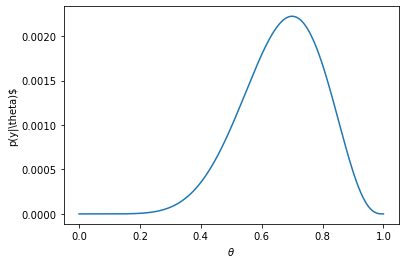

mean= 0.7
mode= 0.6996996996996997


In [57]:
n=scipy.stats.bernoulli.rvs(.5, size=10) #a list of coin flips
p=IndProduct(n,theta)
plt.plot(theta,p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()
print('mean=',np.mean(n))
print('mode=',theta[np.argmax(p)])

$n=100$

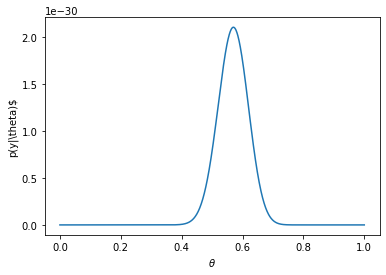

mean= 0.57
mode= 0.5695695695695696


In [58]:
n=scipy.stats.bernoulli.rvs(.5, size=100) #a list of coin flips
p=IndProduct(n,theta)
plt.plot(theta,p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()
print('mean=',np.mean(n))
print('mode=',theta[np.argmax(p)])

$n=1000$

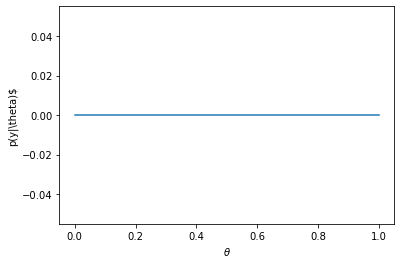

mean= 0.506
mode= 0.5055055055055055


In [59]:
n=scipy.stats.bernoulli.rvs(.5, size=1000) #a list of coin flips
p=IndProduct(n,theta)
plt.plot(theta,p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()
print('mean=',np.mean(n))
print('mode=',theta[np.argmax(p)])

As n increases the mean and the mode of the likelihood function converges towards the true paramter value of $\theta$ of the distribution from which the sampling was carried out. Furthermore, as the likelihood function is the product of probabilities and not a probability distribution the "weight" or absolute value of the product decreases. When n=1000 the pyplot function struggles to plot the curve due to the small size of the numbers. For very large n the mode can't be evaluated with this method due to overflow as values become very small.

#### b.
Changing the functions from previously to log likliehoods

In [60]:
def logLF(y,theta):
    p=np.log(theta)*y+np.log(1-theta)*(1-y)
    return(p)
def LogIndProduct(y,theta): #function for the independent product
    pArray=np.zeros(len(theta))
    for i in range(len(y)):
        pArray+=logLF(y[i],theta)
    return(pArray)

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


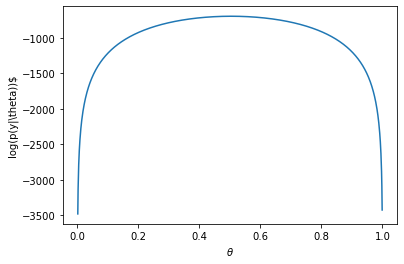

mean= 0.504
mode= 0.0


In [61]:
n=scipy.stats.bernoulli.rvs(.5, size=1000) #a list of coin flips
p=LogIndProduct(n,theta)
plt.plot(theta,p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'log(p(y|\theta))$')
plt.show()
print('mean=',np.mean(n))
print('mode=',theta[np.argmax(p)])

The main difference between the log-likeliehood and the is that there is no overflow at low n since the lowest number encountered at n=10e6 is in the millions range compared to the product method which underflows to 0.

#### c.
Attempting to exponentiate the log-likelihood

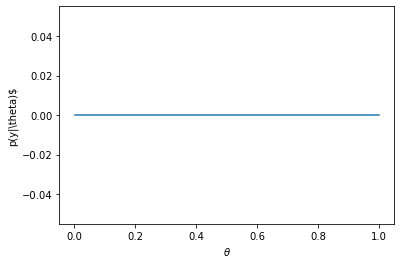

mean= 0.504
mode= 0.0


In [62]:
expp=np.exp(p)
plt.plot(theta,expp)
plt.xlabel(r'$\theta$')
plt.ylabel(r'p(y|\theta)$')
plt.show()
print('mean=',np.mean(n))
print('mode=',theta[np.argmax(expp)])

We once again have overflow problems.

#### d.
i.

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


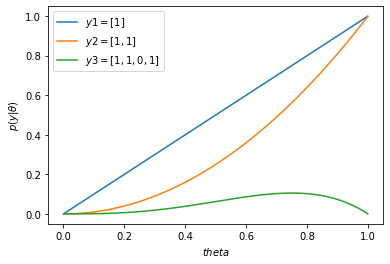

mean y1= nan
mean y2= nan
mean y3= nan


In [63]:
y1=[1]
y2=[1,1]
y3=[1,1,0,1]

Logp1=LogIndProduct(y1,theta)
Logp2=LogIndProduct(y2,theta)
Logp3=LogIndProduct(y3,theta)

p1=np.exp(Logp1)
p2=np.exp(Logp2)
p3=np.exp(Logp3)



plt.plot(theta,p1)
plt.plot(theta,p2)
plt.plot(theta,p3)
plt.legend(['$y1=[1]$','$y2=[1,1]$','$y3=[1,1,0,1]$'])
plt.xlabel(r'$theta$')
plt.ylabel(r'$p(y|\theta)$')
plt.show()
print('mean y1=',np.mean(p1))
print('mean y2=',np.mean(p2))
print('mean y3=',np.mean(p3))


#### e.
The sequences can be viewed as continuations of each other. As we flip two "heads" the likelihood clearly starts shifting towards the only possible value of $\theta$ being 1. But as soon as a 0 has been flipped the likelyhood of $\theta$ exclusively equaling 1 goes to zero. 

### 5.
Defining the Beta distribution using the beta function from the statistical package.

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Text(0, 0.5, '$p(\\theta|a,b)$')

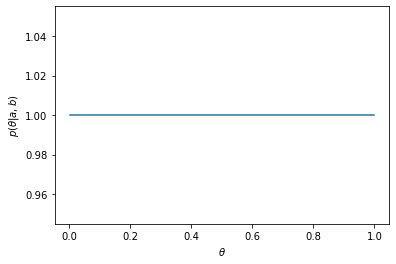

In [64]:
from scipy.special import beta

def LogBetaDist(theta,a,b):
    p=np.log(theta)*(a-1)+np.log(1-theta)*(b-1)-np.log(beta(a,b))
    return(p)
    
a=1
b=1
plt.plot(theta,np.exp(LogBetaDist(theta,a,b)))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|a,b)$')

Taking a=b=1 means assuming no prior bias with the information that two options exists.

Now we use the flips from above and implements is using function 6.8 from the book.

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


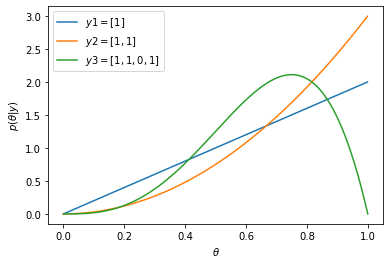

In [65]:
a=1
b=1
#n=scipy.stats.bernoulli.rvs(.1, size=1000) #a list of coin flips
#z=list(n).count(1) #number of heads

y1=[1]
y2=[1,1]
y3=[1,1,0,1]
Y=[y1,y2,y3]
z=[]
n=[]
aPost=[]
bPost=[]
for y in Y:
    z.append(y.count(1)) #number of heads
    n.append(len(y))
    aPost.append(a+y.count(1))
    bPost.append(len(y)-y.count(1)+b)

n1=len(y1)
n2=len(y2)
n3=len(y3)


for i in range(len(aPost)):
    plt.plot(theta,np.exp(LogBetaDist(theta,aPost[i],bPost[i])))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta|y)$')
plt.legend(['$y1=[1]$','$y2=[1,1]$','$y3=[1,1,0,1]$'])

#### ii.
##### 1.
The difference between this figure and the previous figure is that this time we have normalized the likelihood function so that to ensure the functions integrate to 1. This makes them posterior probability functions.

##### 2.
With $a=b=1$ the likelihood function in 6.1 and 6.2 is the same as the nominator in 6.8. This is because the choice of prior ($beta(\theta,1,1)$) imparts no influence on the resulting posterior. The prior is non-informative, the only information contained in the prior is that both the options of tails(0) and heads (1) exist. 

#### iii.

a= [100.    18.25   1.  ]  and b= [100.     6.75   1.  ]


C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

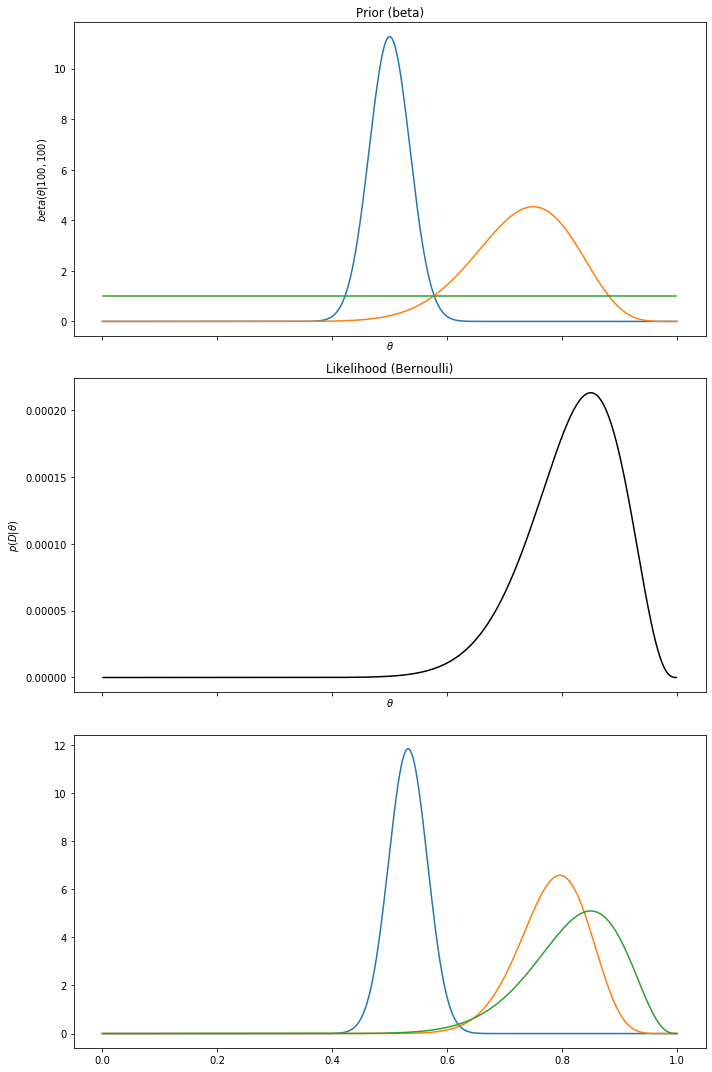

In [66]:
kappa=[200,25] #concentration (could be thought of as sample size)
mode=[.5,.75] #desired prior mode for two first graphs
a=np.ones(len(kappa)+1)
b=np.ones(len(kappa)+1)
for i in range(len(kappa)):
    a[i]=mode[i]*(kappa[i]-2)+1
    b[i]=(1-mode[i])*(kappa[i]-2)+1

print('a=',a,' and b=',b)

#Data for likelihood function
N=20 #20 "flips"
z=17 #17 heads
n=list(np.zeros(N-z))+list(np.ones(z))

Liklhd=np.exp(LogIndProduct(n,theta))

#Data for posterior distributions
aPost=np.ones(3)
bPost=np.ones(3)
for i in range(3):
    aPost[i]=z+a[i]
    bPost[i]=N-z+b[i]

## Plots
fig,axs=plt.subplots(3,1,figsize=(10,15),sharex=True)

#Prior distributions
for i in range(len(kappa)+1):
    axs[0].plot(theta,np.exp(LogBetaDist(theta,a[i],b[i])))
axs[0].set_title('Prior (beta)')
axs[0].set(xlabel=r'$\theta$',ylabel=r'$beta(\theta|100,100)$')

#Likelihood functions
axs[1].plot(theta,Liklhd,'k')
axs[1].set_title('Likelihood (Bernoulli)')
axs[1].set(xlabel=r'$\theta$',ylabel=r'$p(D|\theta)$')

#Posterior distributions
plt.subplot(axs[2])
for i in range(len(kappa)+1):
    axs[2]=plt.plot(theta,np.exp(LogBetaDist(theta,aPost[i],bPost[i])))
#axs[2].set_title('Posterior (beta)') #Varför funkar inte detta?


plt.tight_layout() #Prevents overlapping plots
plt.show

In [67]:
np.exp(LogBetaDist(theta,a[0],b[0]))

C:\Users\viksan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


array([0.00000000e+000, 4.52697664e-237, 2.59821395e-207, 6.37622138e-190,
       1.34992239e-177, 4.79918123e-168, 2.99801675e-160, 1.15145288e-153,
       5.74229067e-148, 6.02250773e-143, 1.84636490e-138, 2.09265681e-134,
       1.04286031e-130, 2.60670043e-127, 3.62032048e-124, 3.02994020e-121,
       1.63140284e-118, 5.96163213e-116, 1.54559037e-113, 2.95034399e-111,
       4.27898462e-109, 4.84330110e-107, 4.37816249e-105, 3.22457425e-103,
       1.96904005e-101, 1.01223711e-099, 4.44035100e-098, 1.68212221e-096,
       5.56203260e-095, 1.62064596e-093, 4.19703713e-092, 9.73537600e-091,
       2.03682377e-089, 3.86812259e-088, 6.70658564e-087, 1.06720392e-085,
       1.56615473e-084, 2.12905794e-083, 2.69200654e-082, 3.17784589e-081,
       3.51451918e-080, 3.65318680e-079, 3.57969690e-078, 3.31583647e-077,
       2.91094115e-076, 2.42779843e-075, 1.92800061e-074, 1.46093365e-073,
       1.05837200e-072, 7.34401428e-072, 4.88956390e-071, 3.12865371e-070,
       1.92691966e-069, 1

In [68]:
axs[1]

In [69]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2B72714A8>,
       list([<matplotlib.lines.Line2D object at 0x000002A2B70BAFD0>])],
      dtype=object)

In [70]:
from scipy.stats import beta

ranges=np.arange(.1,4,.1)
Z=np.zeros((len(ranges),len(ranges)))
for a in range(len(ranges)):
    for b in range(len(ranges)):
        rv=beta(a,b)
        Z[a,b] = rv.pdf
print(Z)
a2, b2 = 3, 3
rv2 = beta(a2, b2)

x = np.linspace(0, 1, 100)
plt.plot(x, rv1.pdf(x))
plt.plot(x, rv2.pdf(x))

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
rv2

In [ ]:
%clear all